# DETECT FAKE NEWS

Team: Phonon <br>
Kotsidou Irene ph4706 <br>
Kyriaki Bimpiri ph4725 <br>
Fotiadis Andreas ph5368 <br>
<br>
Date: 21.12.2021

<b> DATASET WITH THE SHAPE OF (20800, 5)


<B> IMPORT LIBRARIES

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import itertools
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import datasets

In [3]:
#nltk.download('punkt')
#nltk.download('stopwords')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ειρήνη\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<b> LOAD, READ, PROCESS THE DATA SET

In [4]:
#read the data 
news_dataset=pd.read_csv(r'C:\Users\Ειρήνη\Desktop\Πανεπιστήμιο\Φ-252 - Machine Learning\project\train.csv')
#Get shape and head
print("The shape of the dataset is" ,news_dataset.shape)

The shape of the dataset is (20800, 5)


In [5]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
# check for missing values
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
# dropping the nan values
news_dataset = news_dataset.fillna('')

In [8]:
# Remove all rows where complaints column is nan
news_dataset.dropna(subset=['text'], inplace=True)

In [9]:
# check for C
news_dataset.duplicated(subset=["text"]).value_counts()

False    20387
True       413
dtype: int64

In [10]:
dup = news_dataset[news_dataset.duplicated(subset=["text"])]
dup.head()

,id,title,author,text,label
169,169,Mohamad Khweis: Another “Virginia Man” (Palest...,James Fulford,,1
295,295,A Connecticut Reader Reports Record Voter Regi...,VDARE.com Reader,,1
470,470,BULLETIN: There ARE Righteous Jews For Trump!;...,admin,,1
480,480,Watch: Muslim ‘Palestinians’ Declare “We follo...,admin,jewsnews © 2015 | JEWSNEWS | It's not news...u...,1
573,573,Le top des recherches Google passe en top des ...,,,1


In [11]:
dup.shape #duplicates

(413, 5)

In [12]:
# drop duplicates
news_dataset = news_dataset.drop_duplicates(subset={"text"}, keep='first', inplace=False)
news_dataset.shape

(20387, 5)

In [13]:
news_dataset['data'] = news_dataset['text']+' '+news_dataset['title'] 

In [14]:
print(news_dataset['data'])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: data, Length: 20387, dtype: object


<b> Preprocessing Text <br>


In [15]:
stopword_list = stopwords.words('english')
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
stem_words = PorterStemmer()

In [17]:
def stemming(data):
    stemmed_content = re.sub('[^a-zA-Z]',' ',data)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stem_words.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [18]:
news_dataset['data'] = news_dataset['data'].apply(stemming)

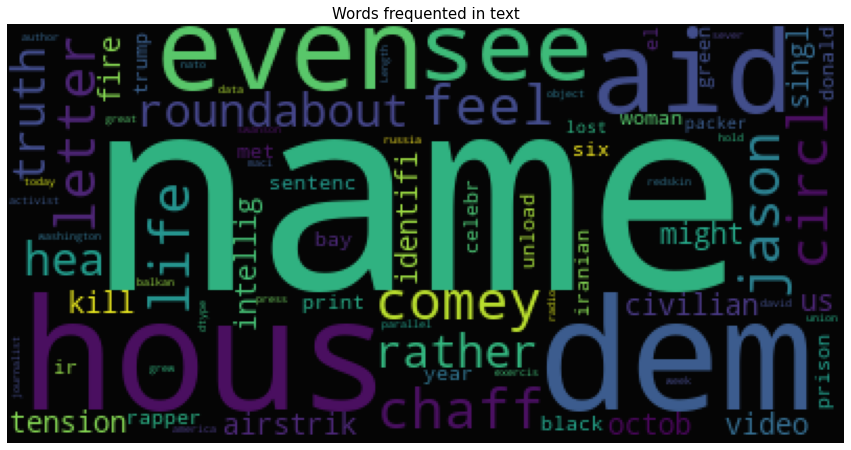

In [19]:
# visualizing
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200, 
                        random_state=42).generate(str(news_dataset['data']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

In [20]:
X = news_dataset['data'].values
Y = news_dataset['label']

In [21]:
# convert text to numbers 
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [22]:
print(X)

  (0, 108970)	0.04986597167065573
  (0, 108917)	0.01923977923976946
  (0, 107970)	0.04476988695342367
  (0, 107966)	0.09630179297814309
  (0, 107923)	0.038139107877236914
  (0, 107886)	0.011443818617132928
  (0, 107242)	0.017334840860641895
  (0, 106433)	0.017307363816974793
  (0, 106345)	0.012686801883994068
  (0, 106259)	0.029588272809310385
  (0, 106181)	0.012992364846329946
  (0, 105981)	0.011913270780594457
  (0, 105136)	0.026134348667485218
  (0, 105100)	0.03174005048217852
  (0, 104098)	0.021879569902139368
  (0, 102692)	0.0663076663261869
  (0, 102006)	0.03358742096722263
  (0, 101755)	0.016599182417650977
  (0, 100987)	0.038593005037593914
  (0, 100349)	0.011215197182532693
  (0, 100339)	0.0437131785722728
  (0, 100286)	0.13804780460073943
  (0, 100138)	0.07209150356728729
  (0, 98854)	0.04008255299584916
  (0, 98289)	0.02746786944421558
  :	:
  (20386, 7425)	0.010639797709860475
  (20386, 7101)	0.02821559498066002
  (20386, 6808)	0.04014227199265025
  (20386, 6770)	0.02542342

In [23]:
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20387, dtype: int64


In [24]:
# split the data 
seed = 124
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=seed)

<b> LOGISTIC REGRESSION 

In [25]:
LR = LogisticRegression()

LR.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction = LR.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction = LR.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  0.9754736648476301
Accuracy score on the test data:  0.9453163315350662


In [26]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred = LR.predict(X_test)
print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.95      0.94      0.95      2078
        REAL       0.94      0.95      0.94      2000

    accuracy                           0.95      4078
   macro avg       0.95      0.95      0.95      4078
weighted avg       0.95      0.95      0.95      4078



In [27]:
# Build confusion matrix
cm_LR = confusion_matrix(Y_test,X_test_prediction)
cm_LR

array([[1957,  121],
       [ 102, 1898]], dtype=int64)

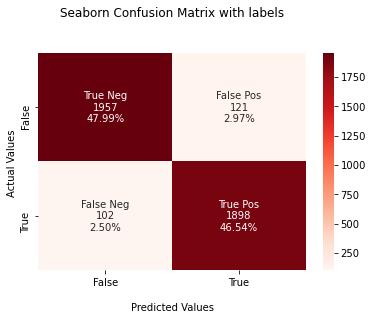

In [28]:
# plot cm
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_LR.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_LR.flatten()/np.sum(cm_LR)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_LR, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [29]:
LR_result = np.array([accuracy_score(Y_test, y_pred),precision_score(Y_test, y_pred), recall_score(Y_test, y_pred),
             f1_score(Y_test, y_pred)])
LR_result

array([0.94531633, 0.94006934, 0.949     , 0.94451356])

<B> RANDOM FOREST

In [30]:
RF = RandomForestClassifier(n_estimators = 20, max_features=20, random_state=seed)

RF.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction_RF = RF.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_RF = RF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_RF, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  0.9754736648476301
Accuracy score on the test data:  0.8128984796468858


In [31]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_RF = RF.predict(X_test)
print(classification_report(Y_test, y_pred_RF, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.78      0.87      0.83      2078
        REAL       0.85      0.75      0.80      2000

    accuracy                           0.81      4078
   macro avg       0.82      0.81      0.81      4078
weighted avg       0.82      0.81      0.81      4078



In [32]:
# Build confusion matrix
cm_rf = confusion_matrix(Y_test,X_test_prediction_RF)
cm_rf

array([[1812,  266],
       [ 497, 1503]], dtype=int64)

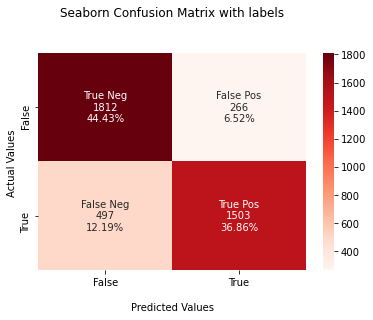

In [33]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_rf.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_rf.flatten()/np.sum(cm_rf)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_rf, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
RF_result = np.array([accuracy_score(Y_test, y_pred_RF), precision_score(Y_test, y_pred_RF), recall_score(Y_test, y_pred_RF), 
             f1_score(Y_test, y_pred_RF)])
RF_result

array([0.81289848, 0.84963256, 0.7515    , 0.79755903])

In [35]:
#random forest with more estimators 

RF2 = RandomForestClassifier(n_estimators = 100, max_features=50, random_state=seed)

RF2.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction_RF2 = RF2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_RF2 = RF2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_RF2, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)


Accuracy score on the training data:  0.9754736648476301
Accuracy score on the test data:  0.874448258950466


In [36]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_RF2 = RF2.predict(X_test)
print(classification_report(Y_test, y_pred_RF2, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.85      0.92      0.88      2078
        REAL       0.91      0.83      0.87      2000

    accuracy                           0.87      4078
   macro avg       0.88      0.87      0.87      4078
weighted avg       0.88      0.87      0.87      4078



In [37]:
# Build confusion matrix
cm_rf2 = confusion_matrix(Y_test,X_test_prediction_RF2)
cm_rf2

array([[1906,  172],
       [ 340, 1660]], dtype=int64)

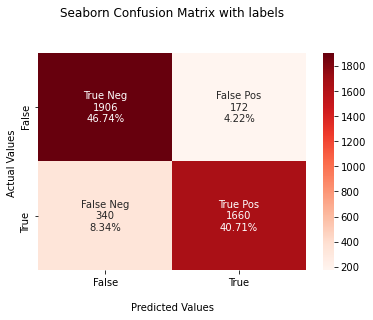

In [38]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_rf2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_rf2.flatten()/np.sum(cm_rf2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_rf2, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [39]:
RF2_result = np.array([accuracy_score(Y_test, y_pred_RF2), precision_score(Y_test, y_pred_RF2), recall_score(Y_test, y_pred_RF2), 
             f1_score(Y_test, y_pred_RF2)])
RF2_result

array([0.87444826, 0.90611354, 0.83      , 0.86638831])

<b> SUPPORT VECTOR MACHINES

In [40]:
svm_clf = SVC(kernel="linear", C=float("inf"))
SVM = svm_clf.fit(X, Y)

SVM.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction_SVM = SVM.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_SVM, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_SVM = SVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_SVM, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  1.0
Accuracy score on the test data:  0.9580676802354096


In [41]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_SVM = SVM.predict(X_test)
print(classification_report(Y_test, y_pred_SVM, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.96      0.96      0.96      2078
        REAL       0.95      0.96      0.96      2000

    accuracy                           0.96      4078
   macro avg       0.96      0.96      0.96      4078
weighted avg       0.96      0.96      0.96      4078



In [42]:
# Build confusion matrix
cm_svm = confusion_matrix(Y_test,X_test_prediction_SVM)
cm_svm

array([[1986,   92],
       [  79, 1921]], dtype=int64)

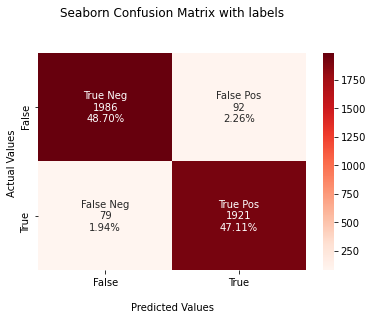

In [43]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_svm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_svm.flatten()/np.sum(cm_svm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_svm, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [44]:
SVM_result = np.array([accuracy_score(Y_test, y_pred_SVM), precision_score(Y_test, y_pred_SVM), recall_score(Y_test, y_pred_SVM), 
             f1_score(Y_test, y_pred_SVM)])
SVM_result

array([0.95806768, 0.95429707, 0.9605    , 0.95738849])

<B> XGBOOST

In [45]:
XGB = XGBClassifier()

XGB.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction_XGB = XGB.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_XGB, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_XGB = XGB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_XGB, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

C:\Users\Ειρήνη\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score on the training data:  0.9999386841621191
Accuracy score on the test data:  0.9740068661108386


In [46]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_XGB= XGB.predict(X_test)
print(classification_report(Y_test, y_pred_XGB, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.98      0.97      0.97      2078
        REAL       0.97      0.97      0.97      2000

    accuracy                           0.97      4078
   macro avg       0.97      0.97      0.97      4078
weighted avg       0.97      0.97      0.97      4078



In [47]:
# Build confusion matrix
cm_xgb = confusion_matrix(Y_test,X_test_prediction_XGB)
cm_xgb

array([[2022,   56],
       [  50, 1950]], dtype=int64)

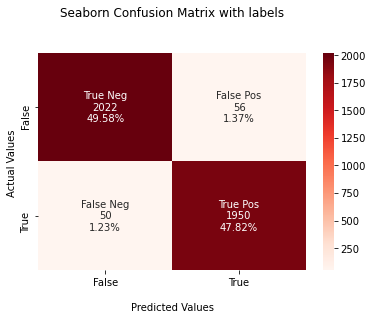

In [48]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_xgb.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_xgb.flatten()/np.sum(cm_xgb)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_xgb, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [49]:
XGB_result = np.array([accuracy_score(Y_test, y_pred_XGB),precision_score(Y_test, y_pred_XGB), recall_score(Y_test, y_pred_XGB),
             f1_score(Y_test, y_pred_XGB) ])
XGB_result

array([0.97400687, 0.97208375, 0.975     , 0.97353969])

In [50]:
XGB2 = XGBClassifier(max_depth=7, learning_rate=0.2, 
                        n_estimators=20,)

XGB2.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction_XGB2 = XGB2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_XGB2, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_XGB2 = XGB2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_XGB2, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

C:\Users\Ειρήνη\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score on the training data:  0.9800723526886995
Accuracy score on the test data:  0.9583128984796468


In [51]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_XGB2= XGB2.predict(X_test)
print(classification_report(Y_test, y_pred_XGB2, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.97      0.95      0.96      2078
        REAL       0.95      0.97      0.96      2000

    accuracy                           0.96      4078
   macro avg       0.96      0.96      0.96      4078
weighted avg       0.96      0.96      0.96      4078



In [52]:
# Build confusion matrix
cm_xgb2 = confusion_matrix(Y_test,X_test_prediction_XGB2)
cm_xgb2

array([[1975,  103],
       [  67, 1933]], dtype=int64)

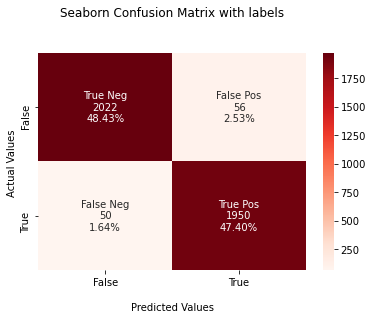

In [53]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_xgb.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_xgb2.flatten()/np.sum(cm_xgb2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_xgb2, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [54]:
XGB2_result = np.array([accuracy_score(Y_test, y_pred_XGB2),precision_score(Y_test, y_pred_XGB2), recall_score(Y_test, y_pred_XGB2),
             f1_score(Y_test, y_pred_XGB2) ])
XGB2_result

array([0.9583129 , 0.94941061, 0.9665    , 0.95787909])

<B> DECISION TREE

In [55]:
DT = DecisionTreeClassifier()

DT.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction_DT = DT.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_DT, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_DT = DT.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_DT, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  1.0
Accuracy score on the test data:  0.9337910740559098


In [56]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_DT= DT.predict(X_test)
print(classification_report(Y_test, y_pred_DT, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.94      0.93      0.93      2078
        REAL       0.93      0.93      0.93      2000

    accuracy                           0.93      4078
   macro avg       0.93      0.93      0.93      4078
weighted avg       0.93      0.93      0.93      4078



In [57]:
# Build confusion matrix
cm_dt = confusion_matrix(Y_test,X_test_prediction_DT)
cm_dt

array([[1939,  139],
       [ 131, 1869]], dtype=int64)

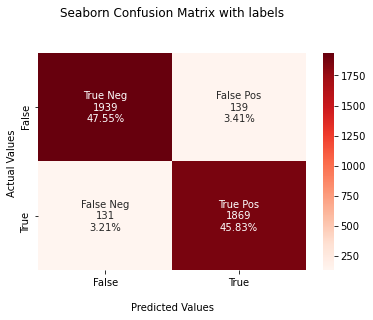

In [58]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_dt, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [59]:
DT_result = np.array([accuracy_score(Y_test, y_pred_DT),precision_score(Y_test, y_pred_DT), recall_score(Y_test, y_pred_DT),
             f1_score(Y_test, y_pred_DT) ])
DT_result

array([0.93379107, 0.93077689, 0.9345    , 0.93263473])

In [60]:
DT2 = DecisionTreeClassifier(max_depth=1, random_state=seed)

DT2.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction_DT2 = DT2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_DT2, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_DT2 = DT2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_DT2, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  0.766509289349439
Accuracy score on the test data:  0.7670426679744973


In [61]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_DT2= DT2.predict(X_test)
print(classification_report(Y_test, y_pred_DT2, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.85      0.66      0.74      2078
        REAL       0.71      0.88      0.79      2000

    accuracy                           0.77      4078
   macro avg       0.78      0.77      0.76      4078
weighted avg       0.78      0.77      0.76      4078



In [62]:
# Build confusion matrix
cm_dt2 = confusion_matrix(Y_test,X_test_prediction_DT2)
cm_dt2

array([[1363,  715],
       [ 235, 1765]], dtype=int64)

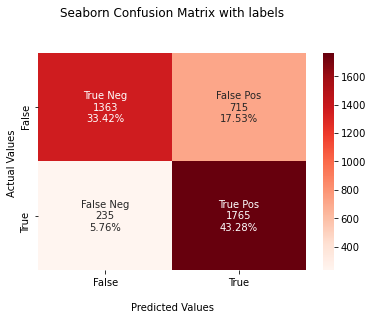

In [63]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_dt2.flatten()/np.sum(cm_dt2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_dt2, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [64]:
DT2_result = np.array([accuracy_score(Y_test, y_pred_DT2),precision_score(Y_test, y_pred_DT2), recall_score(Y_test, y_pred_DT2),
             f1_score(Y_test, y_pred_DT2) ])
DT2_result

array([0.76704267, 0.71169355, 0.8825    , 0.78794643])

In [65]:
DT2 = DecisionTreeClassifier(max_depth=300, random_state=seed)

DT2.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction_DT2 = DT2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_DT2, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_DT2 = DT2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_DT2, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  1.0
Accuracy score on the test data:  0.9345267287886219


In [66]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_DT2= DT2.predict(X_test)
print(classification_report(Y_test, y_pred_DT2, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.94      0.93      0.94      2078
        REAL       0.93      0.94      0.93      2000

    accuracy                           0.93      4078
   macro avg       0.93      0.93      0.93      4078
weighted avg       0.93      0.93      0.93      4078



In [67]:
# Build confusion matrix
cm_dt2 = confusion_matrix(Y_test,X_test_prediction_DT2)
cm_dt2

array([[1936,  142],
       [ 125, 1875]], dtype=int64)

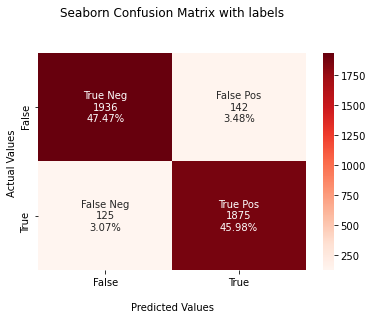

In [68]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_dt2.flatten()/np.sum(cm_dt2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_dt2, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [69]:
DT2_result = np.array([accuracy_score(Y_test, y_pred_DT2),precision_score(Y_test, y_pred_DT2), recall_score(Y_test, y_pred_DT2),
             f1_score(Y_test, y_pred_DT2) ])
DT2_result

array([0.93452673, 0.92959841, 0.9375    , 0.93353249])

<B> PASSIVE AGGRESSIVE CLASSIFIER

In [70]:
PA =PassiveAggressiveClassifier(max_iter=50)
PA.fit(X_train,Y_train)

# Accuracy Score on Training Data
X_train_prediction_PA = PA.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_PA, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_PA = PA.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_PA, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  1.0
Accuracy score on the test data:  0.9602746444335458


In [71]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_PA= PA.predict(X_test)
print(classification_report(Y_test, y_pred_PA, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.96      0.96      0.96      2078
        REAL       0.96      0.96      0.96      2000

    accuracy                           0.96      4078
   macro avg       0.96      0.96      0.96      4078
weighted avg       0.96      0.96      0.96      4078



In [72]:
# Build confusion matrix
cm_pa = confusion_matrix(Y_test,X_test_prediction_PA)
cm_pa

array([[1990,   88],
       [  74, 1926]], dtype=int64)

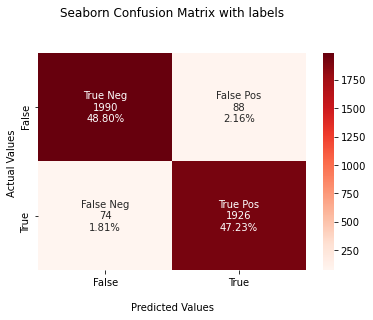

In [73]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_pa.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_pa.flatten()/np.sum(cm_pa)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_pa, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [74]:
PA_result = np.array([accuracy_score(Y_test, y_pred_PA),precision_score(Y_test, y_pred_PA), recall_score(Y_test, y_pred_PA),
             f1_score(Y_test, y_pred_PA) ])
PA_result

array([0.96027464, 0.95630586, 0.963     , 0.95964126])

In [75]:
PA2 =PassiveAggressiveClassifier(max_iter=500)
PA2.fit(X_train,Y_train)

# Accuracy Score on Training Data
X_train_prediction_PA2 = PA2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_PA2, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_PA2 = PA2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_PA2, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  1.0
Accuracy score on the test data:  0.9607650809220206


In [76]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_PA2= PA2.predict(X_test)
print(classification_report(Y_test, y_pred_PA2, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.96      0.96      0.96      2078
        REAL       0.96      0.96      0.96      2000

    accuracy                           0.96      4078
   macro avg       0.96      0.96      0.96      4078
weighted avg       0.96      0.96      0.96      4078



In [77]:
# Build confusion matrix
cm_pa2 = confusion_matrix(Y_test,X_test_prediction_PA2)
cm_pa2

array([[1998,   80],
       [  80, 1920]], dtype=int64)

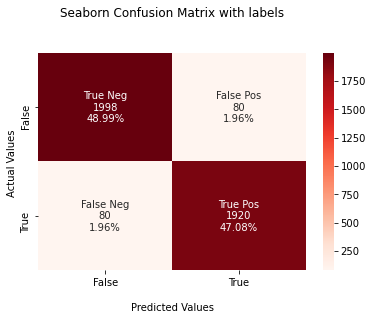

In [78]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_pa2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_pa2.flatten()/np.sum(cm_pa2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_pa2, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [79]:
PA2_result = np.array([accuracy_score(Y_test, y_pred_PA2),precision_score(Y_test, y_pred_PA2), recall_score(Y_test, y_pred_PA2),
             f1_score(Y_test, y_pred_PA2) ])
PA2_result

array([0.96076508, 0.96      , 0.96      , 0.96      ])

<B> PLOTS 

In [80]:
Y1 = np.array(LR_result[:4])
Y2 = np.array(RF_result[:4])
Y3 = np.array(XGB_result[:4])
Y4 = np.array(SVM_result[:4])
Y5 = np.array(DT_result[:4])
Y6 = np.array(PA_result[:4])

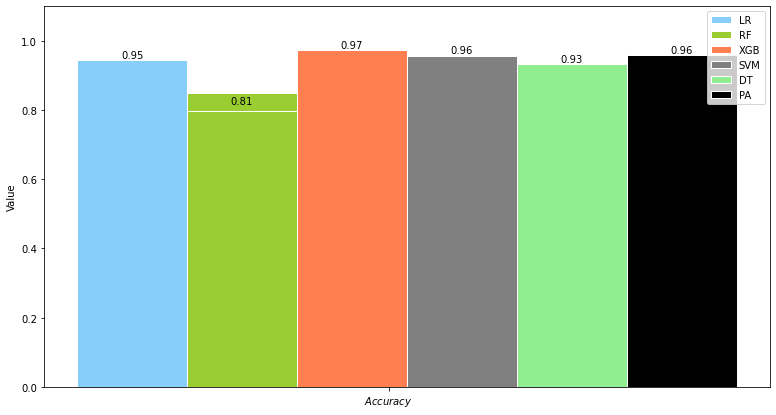

In [81]:
plt.figure(figsize=(13,7))
n = 1
X = np.arange(n)+1
plt.xticks([1.7],[r'$Accuracy$'])
plt.bar(X,Y1,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white',label='LR')
plt.bar(X+0.3,Y2,width = 0.3,facecolor = 'yellowgreen',edgecolor = 'white',label='RF')
plt.bar(X+0.6, Y3, width = 0.3,facecolor = 'coral',edgecolor = 'white',label='XGB')
plt.bar(X+0.9, Y4, width = 0.3,facecolor = 'grey',edgecolor = 'white',label='SVM')
plt.bar(X+1.2, Y5, width = 0.3,facecolor = 'lightgreen',edgecolor = 'white',label='DT')
plt.bar(X+1.5, Y6, width = 0.3,facecolor = 'black',edgecolor = 'white',label='PA')

for x,y in zip(X,Y1):
    plt.text(x, y, '%.2f'% y , ha='center', va= 'bottom')
for x,y in zip(X,Y2):
    plt.text(x+0.3, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y3):
    plt.text(x+0.6, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y4):
    plt.text(x+0.9, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y5):
    plt.text(x+1.2, y, '%.2f' % y, ha='center', va= 'bottom' )  
for x,y in zip(X,Y6):
    plt.text(x+1.5, y, '%.2f' % y, ha='center', va= 'bottom' )    
plt.ylabel('Value')
plt.ylim(0,+1.1)
plt.legend()
plt.show()

In [83]:
y1 = np.array([precision_score(Y_test, y_pred)])
y2 = np.array([precision_score(Y_test, y_pred_RF)])
y3 = np.array([precision_score(Y_test, y_pred_XGB)])
y4 = np.array([precision_score(Y_test, y_pred_SVM)])
y5 = np.array([precision_score(Y_test, y_pred_DT)])
y6 = np.array([precision_score(Y_test, y_pred_PA)])


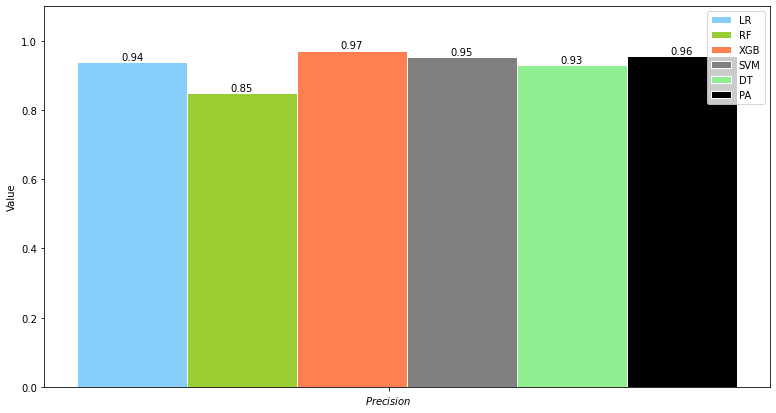

In [84]:
plt.figure(figsize=(13,7))
n = 1
X = np.arange(n)+1
plt.xticks([1.7],[r'$Precision$'])
plt.bar(X,y1,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white',label='LR')
plt.bar(X+0.3,y2,width = 0.3,facecolor = 'yellowgreen',edgecolor = 'white',label='RF')
plt.bar(X+0.6, y3, width = 0.3,facecolor = 'coral',edgecolor = 'white',label='XGB')
plt.bar(X+0.9, y4, width = 0.3,facecolor = 'grey',edgecolor = 'white',label='SVM')
plt.bar(X+1.2, y5, width = 0.3,facecolor = 'lightgreen',edgecolor = 'white',label='DT')
plt.bar(X+1.5, y6, width = 0.3,facecolor = 'black',edgecolor = 'white',label='PA')

for x,y in zip(X,y1):
    plt.text(x, y, '%.2f'% y , ha='center', va= 'bottom')
for x,y in zip(X,y2):
    plt.text(x+0.3, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,y3):
    plt.text(x+0.6, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,y4):
    plt.text(x+0.9, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,y5):
    plt.text(x+1.2, y, '%.2f' % y, ha='center', va= 'bottom' )  
for x,y in zip(X,y6):
    plt.text(x+1.5, y, '%.2f' % y, ha='center', va= 'bottom' )    
plt.ylabel('Value')
plt.ylim(0,+1.1)
plt.legend()
plt.show()

In [85]:
z1 = np.array([recall_score(Y_test, y_pred)])
z2 = np.array([recall_score(Y_test, y_pred_RF)])
z3 = np.array([recall_score(Y_test, y_pred_XGB)])
z4 = np.array([recall_score(Y_test, y_pred_SVM)])
z5 = np.array([recall_score(Y_test, y_pred_DT)])
z6 = np.array([recall_score(Y_test, y_pred_PA)])


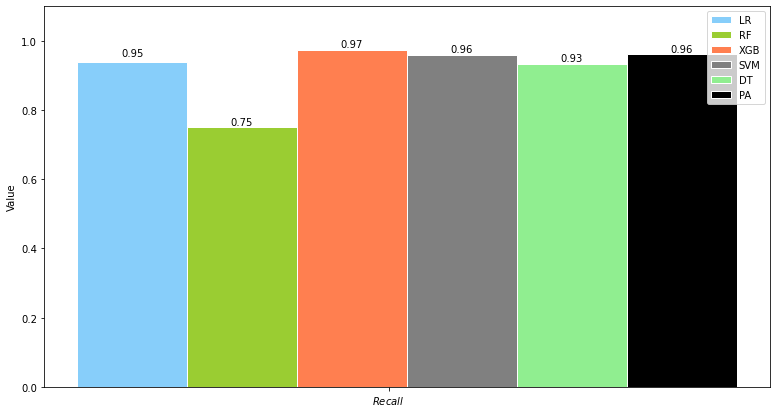

In [86]:
plt.figure(figsize=(13,7))
n = 1
X = np.arange(n)+1
plt.xticks([1.7],[r'$Recall$'])
plt.bar(X,y1,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white',label='LR')
plt.bar(X+0.3,z2,width = 0.3,facecolor = 'yellowgreen',edgecolor = 'white',label='RF')
plt.bar(X+0.6, z3, width = 0.3,facecolor = 'coral',edgecolor = 'white',label='XGB')
plt.bar(X+0.9, z4, width = 0.3,facecolor = 'grey',edgecolor = 'white',label='SVM')
plt.bar(X+1.2, z5, width = 0.3,facecolor = 'lightgreen',edgecolor = 'white',label='DT')
plt.bar(X+1.5, z6, width = 0.3,facecolor = 'black',edgecolor = 'white',label='PA')

for x,y in zip(X,z1):
    plt.text(x, y, '%.2f'% y , ha='center', va= 'bottom')
for x,y in zip(X,z2):
    plt.text(x+0.3, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,z3):
    plt.text(x+0.6, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,z4):
    plt.text(x+0.9, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,z5):
    plt.text(x+1.2, y, '%.2f' % y, ha='center', va= 'bottom' )  
for x,y in zip(X,z6):
    plt.text(x+1.5, y, '%.2f' % y, ha='center', va= 'bottom' )    
plt.ylabel('Value')
plt.ylim(0,+1.1)
plt.legend()
plt.show()

In [87]:
v1 = np.array([f1_score(Y_test, y_pred)])
v2 = np.array([f1_score(Y_test, y_pred_RF)])
v3 = np.array([f1_score(Y_test, y_pred_XGB)])
v4 = np.array([f1_score(Y_test, y_pred_SVM)])
v5 = np.array([f1_score(Y_test, y_pred_DT)])
v6 = np.array([f1_score(Y_test, y_pred_PA)])

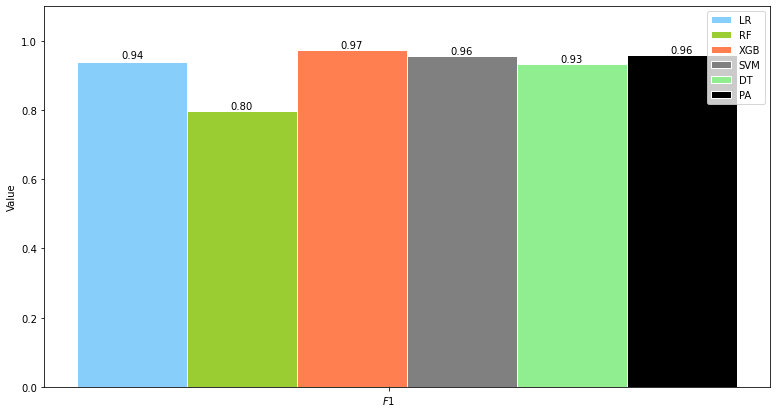

In [88]:
plt.figure(figsize=(13,7))
n = 1
X = np.arange(n)+1
plt.xticks([1.7],[r'$F1$'])
plt.bar(X,y1,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white',label='LR')
plt.bar(X+0.3,v2,width = 0.3,facecolor = 'yellowgreen',edgecolor = 'white',label='RF')
plt.bar(X+0.6, v3, width = 0.3,facecolor = 'coral',edgecolor = 'white',label='XGB')
plt.bar(X+0.9, v4, width = 0.3,facecolor = 'grey',edgecolor = 'white',label='SVM')
plt.bar(X+1.2, v5, width = 0.3,facecolor = 'lightgreen',edgecolor = 'white',label='DT')
plt.bar(X+1.5, v6, width = 0.3,facecolor = 'black',edgecolor = 'white',label='PA')

for x,y in zip(X,v1):
    plt.text(x, y, '%.2f'% y , ha='center', va= 'bottom')
for x,y in zip(X,v2):
    plt.text(x+0.3, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,v3):
    plt.text(x+0.6, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,v4):
    plt.text(x+0.9, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,v5):
    plt.text(x+1.2, y, '%.2f' % y, ha='center', va= 'bottom' )  
for x,y in zip(X,v6):
    plt.text(x+1.5, y, '%.2f' % y, ha='center', va= 'bottom' )    
plt.ylabel('Value')
plt.ylim(0,+1.1)
plt.legend()
plt.show()

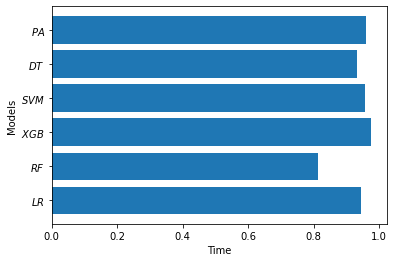

In [82]:
data = [LR_result[0], RF_result[0],XGB_result[0],SVM_result[0],DT_result[0],PA_result[0]]
plt.barh(range(len(data)), data)
plt.yticks([0,1,2,3,4,5],[r'$LR$', r'$RF$', r'$XGB$',r'$SVM$',r'$DT$',r'$PA$'])
plt.xlabel('Time')
plt.ylabel('Models')
plt.show()

In [89]:
X_new = X_test[55]
prediction = LR.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[1]
The news is Fake


In [90]:
X_new = X_test[55]
prediction = SVM.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[1]
The news is Fake


In [91]:
X_new = X_test[55]
prediction = RF.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[1]
The news is Fake


In [92]:
X_new = X_test[55]
prediction = XGB.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[1]
The news is Fake


In [93]:
X_new = X_test[55]
prediction = PA.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[1]
The news is Fake


In [94]:
X_new = X_test[78]
prediction = DT.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[0]
The news is Real


In [95]:
news_dataset[55:100]

,id,title,author,text,label,data
55,55,The Trump Election Will Spark More Individual ...,Lance Schuttler,The Trump Election Will Spark More Individual ...,1,trump elect spark individu collect heal nov ar...
56,56,Ep. 544 FADE to BLACK Jimmy Church w/ Laura Ei...,Madeline,Click Here To Learn More About Alexandra's Per...,1,click learn alexandra person essenc psychic pr...
57,57,Cognition and True Islam - A Book Review,M.R. Islam,1 Shares\n1 0 0 0\nBook Review – Dr. Rafiq Isl...,1,share book review dr rafiq islam emertec r ltd...
58,58,"If Donald Trump Wins The Election, It Will Be ...",The Doc,"If Donald Trump Wins The Election, It Will Be ...",1,donald trump win elect biggest miracl us polit...
59,59,Mindful Eating as Way to Fight Bingeing - The ...,Jeff Gordinier,Editors’ note: We’re resurfacing this 2012 art...,0,editor note resurfac articl smarter live sit t...
60,60,The Major Potential Impact of a Corporate Tax ...,Neil Irwin,The United States system for taxing businesses...,0,unit state system tax busi mess one thing near...
61,61,I wonder what GLP will be like the day after t...,Anonymous Coward (UID 12781064),I wonder what GLP will be like the day after t...,1,wonder glp like day elect wonder glp like day ...
62,62,3 Makers of World’s Smallest Machines Awarded ...,Kenneth Chang and Sewell Chan,Three pioneers in the development of nanomachi...,0,three pioneer develop nanomachin made move mol...
63,63,"Massive Anti-Trump Protests, Union Square NYC ...",Truth Broadcast Network,17 mins ago 2 Views 0 Comments 0 Likes New Z...,1,min ago view comment like new zealand countri ...
64,64,"Review: ‘Lion’ Brings Tears for a Lost Boy, Wi...",A. O. Scott,"The first part of “Lion,” Garth Davis’s unabas...",0,first part lion garth davi unabashedli movi re...


<b> DATASET WITH THE SHAPE OF (6335, 4)


In [96]:
#read the data 
news_dataset_2=pd.read_csv(r'C:\Users\Ειρήνη\Desktop\Πανεπιστήμιο\Φ-252 - Machine Learning\project\proj.csv')
#Get shape and head
print("The shape of the dataset is" ,news_dataset_2.shape)

The shape of the dataset is (6335, 4)


In [97]:
news_dataset_2.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [98]:
label_trans = lambda i: 0 if i == 'FAKE' else 1
news_dataset_2.label = news_dataset_2.label.apply(label_trans)
news_dataset_2.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [99]:
# check for missing values
news_dataset_2.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [100]:
# check for duplicates
news_dataset_2.duplicated(subset=["text"]).value_counts()

False    6060
True      275
dtype: int64

In [101]:
dup_2 = news_dataset_2[news_dataset_2.duplicated(subset=["text"])]
dup_2.head()

,Unnamed: 0,title,text,label
61,1834,Biden makes another surprise political stop,"On this day in 1973, J. Fred Buzhardt, a lawye...",1
90,1661,Exclusive: GOP campaigns plot revolt against RNC,"Killing Obama administration rules, dismantlin...",1
157,1329,How Clinton plans to stop Sanders' momentum,"Killing Obama administration rules, dismantlin...",1
233,1770,"Scott Walker, Rick Perry show limits of super ...","On this day in 1973, J. Fred Buzhardt, a lawye...",1
316,1570,Rand Paul is flatlining,"Killing Obama administration rules, dismantlin...",1


In [102]:
dup_2.shape #duplicates

(275, 4)

In [103]:
# drop duplicates
news_dataset_2 = news_dataset_2.drop_duplicates(subset={"text"}, keep='first', inplace=False)
news_dataset_2.shape

(6060, 4)

In [104]:
news_dataset_2['data'] = news_dataset_2['text']+' '+news_dataset_2['title']

In [105]:
print(news_dataset_2['data'])

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: data, Length: 6060, dtype: object


In [107]:
stem_words = PorterStemmer()

In [111]:
def stemming(data):
    stemmed_content = re.sub('[^a-zA-Z]',' ',data)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
  #  stemmed_content = [stem_words.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [112]:
news_dataset_2['data'] = news_dataset_2['data'].apply(stemming)

In [113]:
X = news_dataset_2['data'].values
Y = news_dataset_2['label']

In [115]:
# convert text to numbers 
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [116]:
print(X)

  (0, 64939)	0.010462942350281173
  (0, 64923)	0.04235206523388288
  (0, 64913)	0.023101521234597664
  (0, 64779)	0.01685266617073848
  (0, 64436)	0.028368079185996757
  (0, 64425)	0.019585590504861396
  (0, 64380)	0.028347988265443644
  (0, 64329)	0.023409448153370746
  (0, 64326)	0.015419050004477224
  (0, 64325)	0.006567364701738188
  (0, 64225)	0.015666535201254803
  (0, 64148)	0.012687356811175304
  (0, 64034)	0.02158469326982925
  (0, 64033)	0.012774369401653926
  (0, 64014)	0.04553662059319734
  (0, 63969)	0.0321277059413144
  (0, 63902)	0.03314910237372664
  (0, 63813)	0.006292038343359337
  (0, 63767)	0.026680513816198913
  (0, 63696)	0.019689885162684457
  (0, 63687)	0.02725707146752536
  (0, 63661)	0.013999557052030964
  (0, 63655)	0.005910455520997995
  (0, 63560)	0.02411252103263835
  (0, 63547)	0.010556248942836036
  :	:
  (6059, 3096)	0.014887238473556148
  (6059, 3009)	0.02812865821570257
  (6059, 2963)	0.02819324748007186
  (6059, 2935)	0.022588458743944217
  (6059, 29

In [117]:
print(Y)

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6060, dtype: int64


In [118]:
# split the data 
seed = 124
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=seed)

<b> LOGISTIC REGRESSION

In [119]:
LR = LogisticRegression()

LR.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction = LR.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction = LR.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  0.9463696369636964
Accuracy score on the test data:  0.8952145214521452


In [120]:
# classification report 
target_names = ['0', '1']
y_pred = LR.predict(X_test)
print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       614
           1       0.92      0.86      0.89       598

    accuracy                           0.90      1212
   macro avg       0.90      0.89      0.89      1212
weighted avg       0.90      0.90      0.90      1212



In [121]:
# Build confusion matrix
cm_LR = confusion_matrix(Y_test,X_test_prediction)
cm_LR

array([[572,  42],
       [ 85, 513]], dtype=int64)

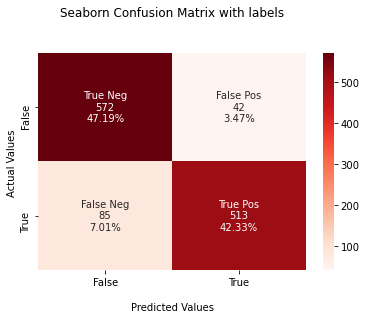

In [122]:
# plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_LR.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_LR.flatten()/np.sum(cm_LR)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_LR, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [123]:
LR_result = np.array([accuracy_score(Y_test, y_pred),precision_score(Y_test, y_pred), recall_score(Y_test, y_pred),
             f1_score(Y_test, y_pred)])
LR_result

array([0.89521452, 0.92432432, 0.85785953, 0.88985256])

<B> RANDOM FOREST

In [124]:
RF = RandomForestClassifier()

RF.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction_RF = RF.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_RF = RF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_RF, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

# classification report 
target_names = ['FAKE', 'REAL']
y_pred_RF = RF.predict(X_test)
print(classification_report(Y_test, y_pred_RF, target_names=target_names))

Accuracy score on the training data:  0.9463696369636964
Accuracy score on the test data:  0.8795379537953796
              precision    recall  f1-score   support

        FAKE       0.86      0.90      0.88       614
        REAL       0.90      0.85      0.88       598

    accuracy                           0.88      1212
   macro avg       0.88      0.88      0.88      1212
weighted avg       0.88      0.88      0.88      1212



In [125]:
# Build confusion matrix
cm_rf = confusion_matrix(Y_test,X_test_prediction_RF)
cm_rf

array([[555,  59],
       [ 87, 511]], dtype=int64)

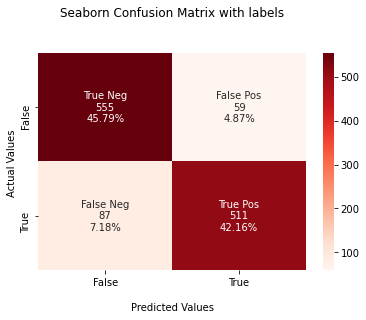

In [126]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_rf.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_rf.flatten()/np.sum(cm_rf)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_rf, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [127]:
RF_result = np.array([accuracy_score(Y_test, y_pred_RF), precision_score(Y_test, y_pred_RF), recall_score(Y_test, y_pred_RF), 
             f1_score(Y_test, y_pred_RF)])
RF_result

array([0.87953795, 0.89649123, 0.85451505, 0.875     ])

<B> SUPPORT VECTOR MACHINE

In [128]:
svm_clf = SVC(kernel="linear", C=float("inf"))
SVM = svm_clf.fit(X, Y)

SVM.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction_SVM = SVM.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_SVM, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_SVM = SVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_SVM, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  1.0
Accuracy score on the test data:  0.9257425742574258


In [129]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_SVM = SVM.predict(X_test)
print(classification_report(Y_test, y_pred_SVM, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.92      0.94      0.93       614
        REAL       0.93      0.91      0.92       598

    accuracy                           0.93      1212
   macro avg       0.93      0.93      0.93      1212
weighted avg       0.93      0.93      0.93      1212



In [130]:
# Build confusion matrix
cm_svm = confusion_matrix(Y_test,X_test_prediction_SVM)
cm_svm

array([[575,  39],
       [ 51, 547]], dtype=int64)

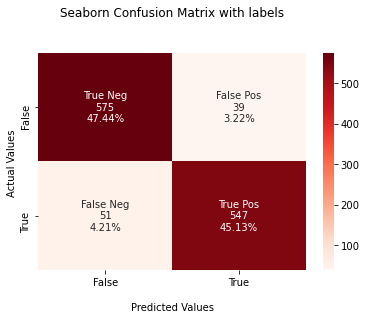

In [131]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_svm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_svm.flatten()/np.sum(cm_svm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_svm, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [132]:
SVM_result = np.array([accuracy_score(Y_test, y_pred_SVM), precision_score(Y_test, y_pred_SVM), recall_score(Y_test, y_pred_SVM), 
             f1_score(Y_test, y_pred_SVM)])
SVM_result

array([0.92574257, 0.9334471 , 0.91471572, 0.92398649])

<B> XGBOOST

In [133]:
XGB = XGBClassifier()

XGB.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction_XGB = XGB.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_XGB, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_XGB = XGB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_XGB, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

C:\Users\Ειρήνη\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score on the training data:  1.0
Accuracy score on the test data:  0.9125412541254125


In [134]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_XGB= XGB.predict(X_test)
print(classification_report(Y_test, y_pred_XGB, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.92       614
        REAL       0.93      0.89      0.91       598

    accuracy                           0.91      1212
   macro avg       0.91      0.91      0.91      1212
weighted avg       0.91      0.91      0.91      1212



In [135]:
# Build confusion matrix
cm_xgb = confusion_matrix(Y_test,X_test_prediction_XGB)
cm_xgb

array([[574,  40],
       [ 66, 532]], dtype=int64)

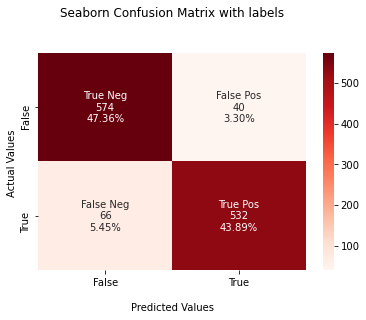

In [136]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_xgb.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_xgb.flatten()/np.sum(cm_xgb)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_xgb, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [137]:
XGB_result = np.array([accuracy_score(Y_test, y_pred_XGB),precision_score(Y_test, y_pred_XGB), recall_score(Y_test, y_pred_XGB),
             f1_score(Y_test, y_pred_XGB) ])
XGB_result

array([0.91254125, 0.93006993, 0.88963211, 0.90940171])

<B> DECISION TREE

In [138]:
DT = DecisionTreeClassifier()

DT.fit(X_train, Y_train)

# Accuracy Score on Training Data
X_train_prediction_DT = DT.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_DT, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction_DT = DT.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_DT, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  1.0
Accuracy score on the test data:  0.8094059405940595


In [139]:
# classification report 
target_names = ['FAKE', 'REAL']
y_pred_DT= DT.predict(X_test)
print(classification_report(Y_test, y_pred_DT, target_names=target_names))

              precision    recall  f1-score   support

        FAKE       0.81      0.81      0.81       614
        REAL       0.81      0.81      0.81       598

    accuracy                           0.81      1212
   macro avg       0.81      0.81      0.81      1212
weighted avg       0.81      0.81      0.81      1212



In [140]:
# Build confusion matrix
cm_dt = confusion_matrix(Y_test,X_test_prediction_DT)
cm_dt

array([[498, 116],
       [115, 483]], dtype=int64)

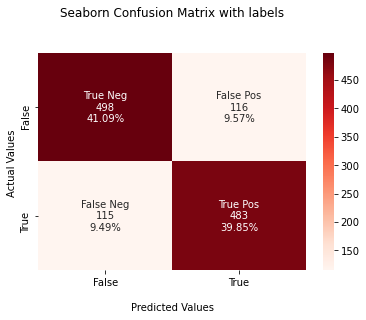

In [141]:
#plot cm
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_dt, annot=labels, fmt='', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [142]:
DT_result = np.array([accuracy_score(Y_test, y_pred_DT),precision_score(Y_test, y_pred_DT), recall_score(Y_test, y_pred_DT),
             f1_score(Y_test, y_pred_DT) ])
DT_result

array([0.80940594, 0.80634391, 0.80769231, 0.80701754])

<B> GRAPHS

In [143]:
Y1 = np.array(LR_result[:1])
Y2 = np.array(RF_result[:1])
Y3 = np.array(XGB_result[:1])
Y4 = np.array(SVM_result[:1])
Y5 = np.array(DT_result[:1])

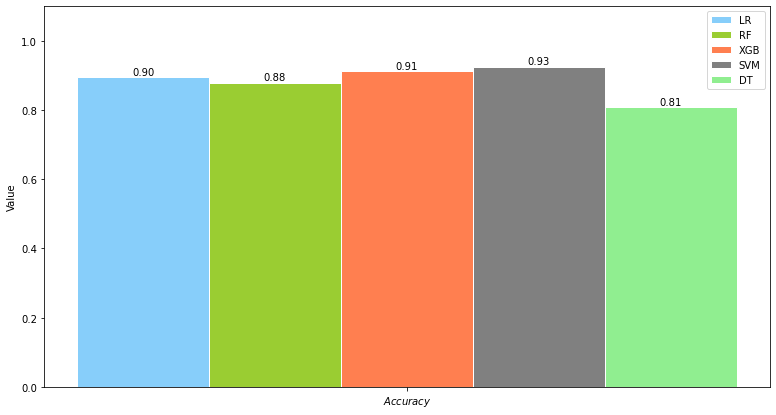

In [152]:
plt.figure(figsize=(13,7))
n = 1
X = np.arange(n)+1
plt.xticks([1.6],[r'$Accuracy$'])
plt.bar(X,Y1,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white',label='LR')
plt.bar(X+0.3,Y2,width = 0.3,facecolor = 'yellowgreen',edgecolor = 'white',label='RF')
plt.bar(X+0.6, Y3, width = 0.3,facecolor = 'coral',edgecolor = 'white',label='XGB')
plt.bar(X+0.9, Y4, width = 0.3,facecolor = 'grey',edgecolor = 'white',label='SVM')
plt.bar(X+1.2, Y5, width = 0.3,facecolor = 'lightgreen',edgecolor = 'white',label='DT')

for x,y in zip(X,Y1):
    plt.text(x, y, '%.2f'% y , ha='center', va= 'bottom')
for x,y in zip(X,Y2):
    plt.text(x+0.3, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y3):
    plt.text(x+0.6, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y4):
    plt.text(x+0.9, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y5):
    plt.text(x+1.2, y, '%.2f' % y, ha='center', va= 'bottom' )    

    plt.ylabel('Value')
plt.ylim(0,+1.1)
plt.legend()
plt.show()

In [158]:
y1 = np.array([precision_score(Y_test, y_pred)])
y2 = np.array([precision_score(Y_test, y_pred_RF)])
y3 = np.array([precision_score(Y_test, y_pred_XGB)])
y4 = np.array([precision_score(Y_test, y_pred_SVM)])
y5 = np.array([precision_score(Y_test, y_pred_DT)])

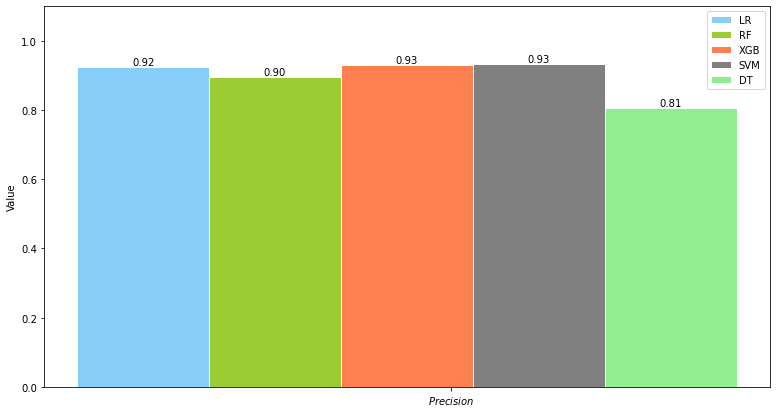

In [159]:
plt.figure(figsize=(13,7))
n = 1
X = np.arange(n)+1
plt.xticks([1.7],[r'$Precision$'])
plt.bar(X,y1,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white',label='LR')
plt.bar(X+0.3,y2,width = 0.3,facecolor = 'yellowgreen',edgecolor = 'white',label='RF')
plt.bar(X+0.6, y3, width = 0.3,facecolor = 'coral',edgecolor = 'white',label='XGB')
plt.bar(X+0.9, y4, width = 0.3,facecolor = 'grey',edgecolor = 'white',label='SVM')
plt.bar(X+1.2, y5, width = 0.3,facecolor = 'lightgreen',edgecolor = 'white',label='DT')


for x,y in zip(X,y1):
    plt.text(x, y, '%.2f'% y , ha='center', va= 'bottom')
for x,y in zip(X,y2):
    plt.text(x+0.3, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,y3):
    plt.text(x+0.6, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,y4):
    plt.text(x+0.9, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,y5):
    plt.text(x+1.2, y, '%.2f' % y, ha='center', va= 'bottom' )  

plt.ylabel('Value')
plt.ylim(0,+1.1)
plt.legend()
plt.show()

In [160]:
z1 = np.array([recall_score(Y_test, y_pred)])
z2 = np.array([recall_score(Y_test, y_pred_RF)])
z3 = np.array([recall_score(Y_test, y_pred_XGB)])
z4 = np.array([recall_score(Y_test, y_pred_SVM)])
z5 = np.array([recall_score(Y_test, y_pred_DT)])

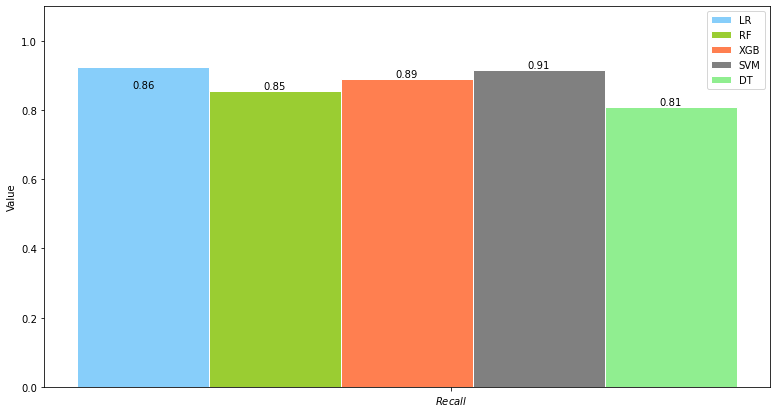

In [161]:
plt.figure(figsize=(13,7))
n = 1
X = np.arange(n)+1
plt.xticks([1.7],[r'$Recall$'])
plt.bar(X,y1,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white',label='LR')
plt.bar(X+0.3,z2,width = 0.3,facecolor = 'yellowgreen',edgecolor = 'white',label='RF')
plt.bar(X+0.6, z3, width = 0.3,facecolor = 'coral',edgecolor = 'white',label='XGB')
plt.bar(X+0.9, z4, width = 0.3,facecolor = 'grey',edgecolor = 'white',label='SVM')
plt.bar(X+1.2, z5, width = 0.3,facecolor = 'lightgreen',edgecolor = 'white',label='DT')

for x,y in zip(X,z1):
    plt.text(x, y, '%.2f'% y , ha='center', va= 'bottom')
for x,y in zip(X,z2):
    plt.text(x+0.3, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,z3):
    plt.text(x+0.6, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,z4):
    plt.text(x+0.9, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,z5):
    plt.text(x+1.2, y, '%.2f' % y, ha='center', va= 'bottom' )  

plt.ylabel('Value')
plt.ylim(0,+1.1)
plt.legend()
plt.show()

In [162]:
v1 = np.array([f1_score(Y_test, y_pred)])
v2 = np.array([f1_score(Y_test, y_pred_RF)])
v3 = np.array([f1_score(Y_test, y_pred_XGB)])
v4 = np.array([f1_score(Y_test, y_pred_SVM)])
v5 = np.array([f1_score(Y_test, y_pred_DT)])


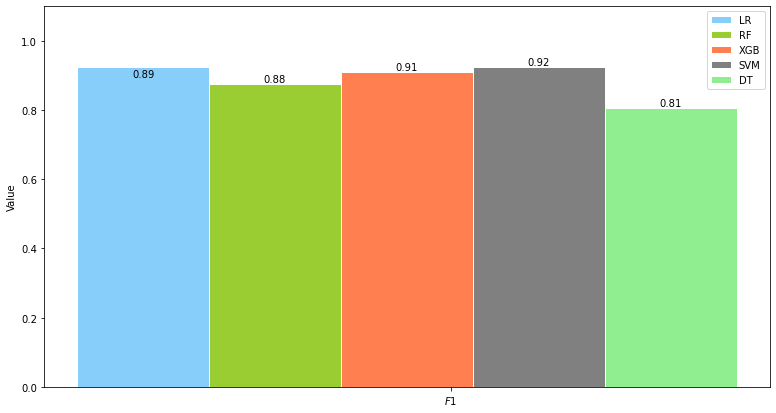

In [163]:
plt.figure(figsize=(13,7))
n = 1
X = np.arange(n)+1
plt.xticks([1.7],[r'$F1$'])
plt.bar(X,y1,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white',label='LR')
plt.bar(X+0.3,v2,width = 0.3,facecolor = 'yellowgreen',edgecolor = 'white',label='RF')
plt.bar(X+0.6, v3, width = 0.3,facecolor = 'coral',edgecolor = 'white',label='XGB')
plt.bar(X+0.9, v4, width = 0.3,facecolor = 'grey',edgecolor = 'white',label='SVM')
plt.bar(X+1.2, v5, width = 0.3,facecolor = 'lightgreen',edgecolor = 'white',label='DT')


for x,y in zip(X,v1):
    plt.text(x, y, '%.2f'% y , ha='center', va= 'bottom')
for x,y in zip(X,v2):
    plt.text(x+0.3, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,v3):
    plt.text(x+0.6, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,v4):
    plt.text(x+0.9, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,v5):
    plt.text(x+1.2, y, '%.2f' % y, ha='center', va= 'bottom' )  

plt.ylabel('Value')
plt.ylim(0,+1.1)
plt.legend()
plt.show()

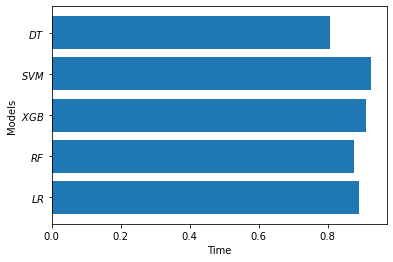

In [164]:
data = [LR_result[3], RF_result[3],XGB_result[3],SVM_result[3],DT_result[3]]
plt.barh(range(len(data)), data)
plt.yticks([0,1,2,3,4],[r'$LR$', r'$RF$', r'$XGB$',r'$SVM$',r'$DT$'])
plt.xlabel('Time')
plt.ylabel('Models')
plt.show()

<B> PREDICTIONS

In [165]:
X_new = X_test[4]
prediction = LR.predict(X_new)

if (prediction[0]==1):
    print('The news is Real')
else:
    print('The news is Fake')

The news is Real


In [166]:
X_new = X_test[4]
prediction = RF.predict(X_new)

if (prediction[0]==1):
    print('The news is Real')
else:
    print('The news is Fake')

The news is Real


In [167]:
X_new = X_test[4]
prediction = SVM.predict(X_new)

if (prediction[0]==1):
    print('The news is Real')
else:
    print('The news is Fake')

The news is Real


In [169]:
X_new = X_test[100]
prediction = XGB.predict(X_new)

if (prediction[0]==1):
    print('The news is Real')
else:
    print('The news is Fake')

The news is Fake


In [154]:
X_new = X_test[97]
prediction = DT.predict(X_new)
print(prediction)

if (prediction[0]==1):
    print('The news is Real')
else:
    print('The news is Fake')

[0]
The news is Fake


In [151]:
news_dataset_2[3:100]

,Unnamed: 0,title,text,label,data
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,kaydee king kaydeeking november the lesson fro...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,it s primary day in new york and front runners...
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",0,i m not an immigrant but my grandparents are m...
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",0,share this baylee luciani left screenshot of w...
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,1,a czech stockbroker who saved more than jewish...
...,...,...,...,...,...
97,3255,Give Social Security recipients a CEO-style raise,(CNN) On Veterans Day we recognize and honor t...,1,cnn on veterans day we recognize and honor the...
98,3177,"Fireworks erupt between Trump and Bush, Rubio ...",Sparks flew at the toughest and liveliest GOP ...,1,sparks flew at the toughest and liveliest gop ...
99,2832,"Obama, sounding like his critics, admits no 'c...",The online comment fits closely with his campa...,1,the online comment fits closely with his campa...
100,4294,How Ted Cruz Became Ted Cruz,"In 2008, in the high-profile Supreme Court gun...",1,in in the high profile supreme court gun right...
